In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"nanamulyanamaghfur","key":"11da37dbb74c981039e2be0329480536"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d larsen0966/student-performance-data-set

student-performance-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip student-performance-data-set.zip -d student_performance

Archive:  student-performance-data-set.zip
replace student_performance/student-por.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: student_performance/student-por.csv  


In [6]:
import pandas as pd

data = pd.read_csv("/content/student_performance/student-por.csv")
y
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [7]:
x = data[["studytime", "freetime", "G1", "G2"]]
y = data["G3"] 

In [8]:
import numpy as np

"""def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_columns = ["studytime", "freetime"]

for col in scaled_columns:
  x[col] = NormalizeData(x[col])"""

# Custom Normalization based on data characteristic

x['studytime'] = x['studytime'] / 4
x['freetime'] = x['freetime'] / 5

# We rescale the grade system from base 20 into base 100
x['G1'] = x['G1'] * 5 / 100
x['G2'] = x['G2'] * 5 / 100 

x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,studytime,freetime,G1,G2
0,0.50,0.6,0.00,0.55
1,0.50,0.6,0.45,0.55
2,0.50,0.6,0.60,0.65
3,0.75,0.4,0.70,0.70
4,0.50,0.6,0.55,0.65


In [9]:
y = y * 5 / 100

y.head()

0    0.55
1    0.55
2    0.60
3    0.70
4    0.65
Name: G3, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [11]:
x_train.shape

(519, 4)

In [12]:
y_train.shape

(519,)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
      Dense(128, input_shape=[4], activation="relu"),
      Dense(512, activation="relu"),
      Dense(256, activation="relu"),
      Dense(64, activation="relu"),
      Dense(16, activation="relu"),
      Dense(4, activation="relu"),
      Dense(1)])

In [14]:
model.compile(optimizer="adam", loss=tf.keras.losses.Huber())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [16]:
history = model.fit(x= x_train, y= y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

Epoch 1/500
17/17 [==============================] - 1s 25ms/step - loss: 0.0692 - val_loss: 0.0085
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0095 - val_loss: 0.0034
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 5/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/500
17/17 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 9/500
17/17 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/500
17/17 [==============================] - 0s 7ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 11

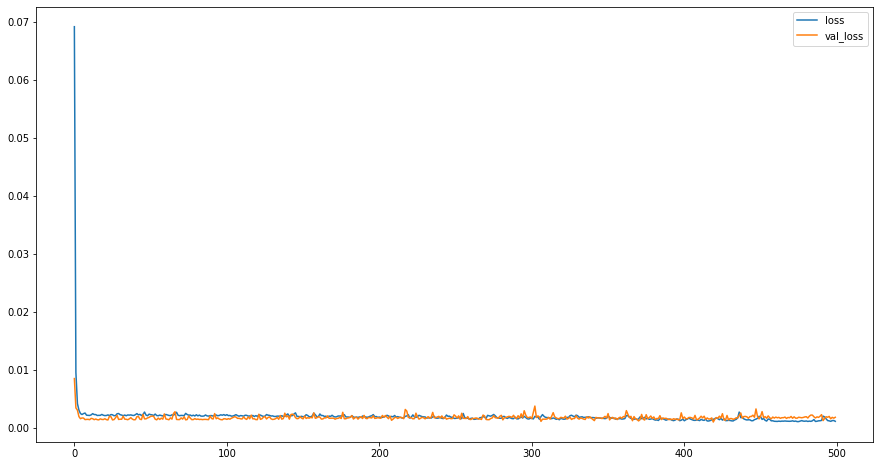

In [17]:
pd.DataFrame(history.history).plot(figsize=(15,8))

In [18]:
predictions = model.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

print("The absolute mean error :",mean_absolute_error(y_test, predictions))
print("The squared mean error :",mean_squared_error(y_test, predictions))
print("The Variance Score :", explained_variance_score(y_test, predictions))

The absolute mean error : 0.04100839763879776
The squared mean error : 0.0035711436263898342
The Variance Score : 0.8893545610540279


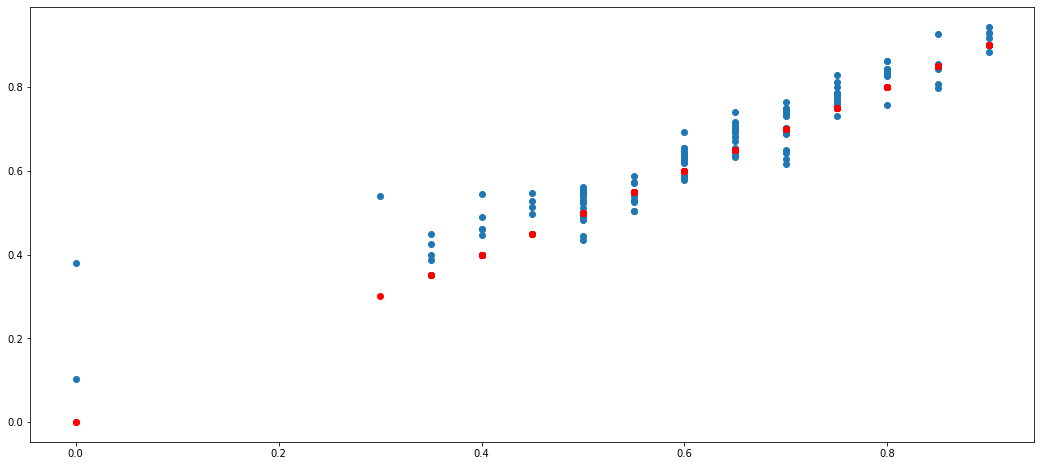

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.scatter(y_test, predictions)
plt.scatter(y_test,y_test,color="red")

In [21]:
from sklearn.metrics import r2_score

sq = r2_score(y_test, predictions)
print('coefficient of determination:', sq)

coefficient of determination: 0.8602114066660763


In [22]:
model.save("GF_V2_model.h5")

In [23]:
x_test.tail()

,studytime,freetime,G1,G2
51,0.50,0.6,0.80,0.70
321,0.75,0.4,0.65,0.75
514,0.25,0.2,0.35,0.30
327,1.00,0.4,0.85,0.85
579,0.25,0.6,0.45,0.50


In [24]:
y_test.tail()

51     0.80
321    0.75
514    0.35
327    0.90
579    0.45
Name: G3, dtype: float64

In [25]:
predictions = model.predict(x_test.tail())
print(np.round(predictions, 2))

[[0.76]
 [0.78]
 [0.39]
 [0.9 ]
 [0.51]]


In [29]:
print(np.round(model.predict([[0.75,0.6,0.65,0.90]]), 2))

[[0.88]]
